In [54]:
import math
import matplotlib.pyplot as plt
import numpy as np

material = "concrete"
TemperatureOld = 25
TemperatureNew = 30
TKelvinOld = TemperatureOld + 273.15
TKelvinNew = TemperatureNew + 273.15
RHumOld = 70
RHumNew = 70
kg = 10


match material:
    case "concrete":
        # https://www.mdpi.com/2075-5309/13/4/965
        # Lu Z-H, Lun P-Y, Li W, Luo Z, Li Y, Liu P. Empirical model of corrosion rate for steel reinforced concrete structures in chloride-laden environments. Advances in Structural Engineering. 2019;22(1):223-239. doi:10.1177/1369433218783313 https://journals.sagepub.com/doi/full/10.1177/1369433218783313

        print('owo')
        TemperatureNew = 30 + 273 # K
        time = 1 # years
        wc = 0.45 # water cement ratio
        C = 50 # concrete cover thickness mm
        Ct = 0.20  # chloride content by weight of concrete (kg/m3)
        RHumNew = 90 # Relative humidity
        Rho = 1 # concrete resistivity (kΩ cm)
        
        #time = np.array([0, 10, 30, 50, 80, 100, 150])
        # ADD TIME
        # ADD ACTUAL MASS LOSS (CONVERT WITH MOLLES)


        RHumOld = 70

        lognew = (math.log(Ct - (3034 / (TKelvinNew * (2.5 + RHumNew) - (5*(10**-3) * Rho)))))
        corrosionratetimewisenew = 1.38 * (((1 - wc)**-1.64) / (((1 + time) * C)**(1/3))) * math.exp(1.23 + 0.618 * lognew)
        # (μA/cm2)

        logold = (math.log(Ct - (3034 / (TKelvinOld * (2.5 + RHumOld) - (5*(10**-3) * Rho)))))
        corrosionratetimewisenewold = 1.38 * (((1 - wc)**-1.64) / (((1 + time) * C)**(1/3))) * math.exp(1.23 + 0.618 * logold)

        #corrosionratetimewise = 1.38 * ((1 - wc)**-1.64) / (((1 + time) * C)**1/3) * math.exp(1.23 + 0.618 * math.log(Ct-(3034 / (TemperatureNew * (2.5 + RHum)- ((5*(10**-3)) * Rho)))))
        print(corrosionratetimewisenew, corrosionratetimewisenewold)



    case "wood":
        # validation of method https://www.fpl.fs.usda.gov/documnts/pdf2001/white01a.pdf
        # https://www.e3s-conferences.org/articles/e3sconf/pdf/2021/56/e3sconf_icsf2021_07009.pdf
        # A = 10000000000000 # preexponential factor, constant for small temperature changes such as 10 C https://www.chemguide.co.uk/physical/basicrates/arrhenius.html
        R = 8.31446261815324 # Universal gas Constant J K-1 mol-1
        #EActEnergy = 132.49 * 1000 # https://www.sciencedirect.com/science/article/abs/pii/S096085241931329X
        EActEnergy = 130 * 1000 # file:///D:/Downloads/Kinetic_analysis_of_thermal_degradation_of_Cedrela.pdf
        A = 1.57* (10**12) # 1.57* (10**12) # https://www.researchgate.net/publication/299646285_Modeling_of_the_pyrolysis_of_biomass_under_parabolic_and_exponential_temperature_increases_using_the_Distributed_Activation_Energy_Model
        MassLossOld =  A * math.exp(-EActEnergy / (R * TKelvinOld)) # first-order Arrhenius equation, massloss/rateconstant mol^-1 s^-1
        MassLossNew =  A * math.exp(-EActEnergy / (R * TKelvinNew)) # first-order Arrhenius equation, massloss/rateconstant mol^-1 s^-1

        molarmass = 220.2339 # gram/mole C6H12O6 + Ca https://www.plantchicago.org/post/thinking-circular-with-chemistry#:~:text=In%20actuality%20wood%20is%20mostly,formula%20is%3A%20C6H12O6%20%2B%20Ca.

        gram = kg * 1000
        mol = gram / molarmass
        print(mol)

        # total time needed for reduction mass to 0
        totaltimeold = mol / MassLossOld
        totaltime = mol / MassLossNew

        # convertion from mol to kg
        weight = (mol * molarmass) / 1000 # in kg
        lossold = (MassLossOld * molarmass) / 1000
        lossnew = (MassLossNew * molarmass) / 1000
        print(MassLossNew, "masslossnew")

        # seconds and years
        time = np.array([0, 10, 30, 50, 80, 100, 150])
        time_seconds = time.astype(np.int64) * 3600 * 24 * 365
        time_years = time_seconds / (3600 * 24 * 365) # convert time to years

        # forumlas for plotting
        formulanew = (weight - ((lossnew) * (time_seconds.astype(np.int64))))
        formulaold = (weight - ((lossold) * (time_seconds.astype(np.int64))))
        print(time_seconds)
        print(lossnew)
        print(formulanew)

        x_max = np.max(time_seconds)
        y_max = (np.max(formulanew) + (np.max(formulanew)*0.1))
        y_min = np.max(formulanew)*0.9

        fig, ax = plt.subplots()
        ax.plot(time_years, formulanew, label='New')
        ax.plot(time_years, formulaold, label='Old')
        ax.set_title("Degradation")
        ax.set_ylabel('Weight (kg)')
        ax.set_xlabel('Time (years)')
        # ax.set_ylim(y_min, y_max)  # Set x-axis limit from 0
        # ax.set_xticks(time_years)  # Set x-axis ticks to the exact values of time_years
        ax.legend()
        plt.show()


# concrete pdf https://inis.iaea.org/collection/NCLCollectionStore/_Public/28/057/28057515.pdf

owo
0.619789974498252 0.47476950005838314


In [57]:
TemperatureNew = 30 + 273 # K
time = 1 # years
wc = 0.45 # water cement ratio
C = 50 # concrete cover thickness mm
Ct = 0.20  # chloride content by weight of concrete (kg/m3)
RHumNew = 90 # Relative humidity
Rho = 1 # concrete resistivity (kΩ cm)

#time = np.array([0, 10, 30, 50, 80, 100, 150])
# ADD TIME
# ADD ACTUAL MASS LOSS (CONVERT WITH MOLLES)


RHumOld = 70

lognew = (math.log(Ct - (3034 / (TKelvinNew * (2.5 + RHumNew) - (5*(10**-3) * Rho)))))
corrosionratetimewisenew = (1.38 * (((1 - wc)**-1.64) / (((1 + time) * C)**(1/3)))) * math.exp(1.23 + 0.618 * lognew)
# (μA/cm2)

print(corrosionratetimewisenew)

# Define constants
density = 7.874  # g/cm3 https://amesweb.info/Materials/Density_of_Iron.aspx
atomic_weight_iron = 55.845  # g/mol atomic weight https://ciaaw.org/iron.htm
faraday_constant = 96.485  # C/mol proportionality constant https://www.sciencedirect.com/topics/engineering/faradays-constant#:~:text=The%20known%20Faraday%20constant%2096%2C485,by%201%20mol%20of%20electrons.

# Define input parameters
corrosion_rate = corrosionratetimewisenew   # μA/cm2 in a year

# 0.6119577140021142 0.474421844860182 one year
# 0.3511211447869821 0.26896467711565547 ten years

# Coulombs/cm2 (1 microampere is 10**-6 coulombs)
coulombscm2 = corrosion_rate * 10**-6

# https://en.wikipedia.org/wiki/Faraday%27s_laws_of_electrolysis

# m = (Q * M) / (n * Z = Z) formula for Faraday's first law
# mass loss rate in g/cm2/year using Faraday's Law
# 2 for n is used because 2 electrons are transferred in the electrochemical reaction during oxidation of Fe
mass_loss_rate = (coulombscm2 * atomic_weight_iron) / (2 * faraday_constant)

# Convert mass loss rate from g/cm2/year to mm/year using density of iron
mm_per_year = (mass_loss_rate * 10**7) / density

# Print result
print(f"The corrosion rate of {corrosion_rate} μA/cm2 in a year corresponds to {mm_per_year:.5f} per year.")

0.619789974498252
The corrosion rate of 0.619789974498252 μA/cm2 in a year corresponds to 0.22779 mm in 1 year.


In [62]:
wc = 0.45
time = 10
x =  (((1 - wc)**-1.64) / (((1 + time) * C)**(1/3)))

print(x)

0.3253501111194688


In [64]:
time = [1, 10, 20, 30]

TKelvinNew = 30 + 273 # K
time = 1 # years
wc = 0.45 # water cement ratio
C = 50 # concrete cover thickness mm
Ct = 0.20  # chloride content by weight of concrete (kg/m3)
RHumNew = 90 # Relative humidity
Rho = 1 # concrete resistivity (kΩ cm)

lognew = (math.log(Ct - (3034 / (TKelvinNew * (2.5 + RHumNew) - (5*(10**-3) * Rho)))))
corrosionratetimewisenew = (1.38 * (((1 - wc)**-1.64) / (((1 + time) * C)**(1/3)))) * math.exp(1.23 + 0.618 * lognew)

ax.plot(time, lognew, label='New')
plt.show()

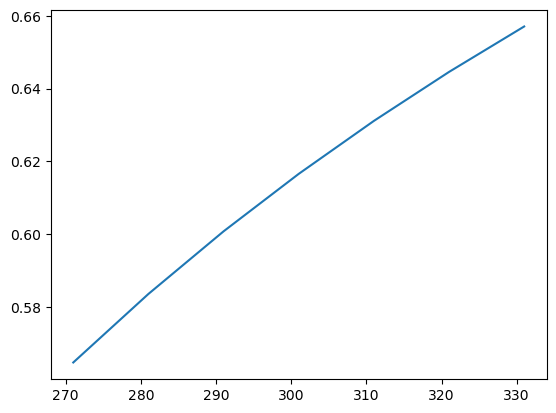

TypeError: unsupported operand type(s) for +: 'float' and 'list'

In [77]:
import math
import matplotlib.pyplot as plt

# Input data
Temp = [271, 281, 291, 301, 311, 321, 331]
wc = 0.45 # water cement ratio
C = 50 # concrete cover thickness mm
Ct = 0.20  # chloride content by weight of concrete (kg/m3)
RHumNew = 90 # Relative humidity
Rho = 1 # concrete resistivity (kΩ cm)
t = 1 # time in year

corrosion_rate = [] # Initialize the list

for T in Temp:
    lognew = (math.log(Ct - (3034 / (T * (2.5 + RHumNew) - (5*(10**-3) * Rho)))))
    corrosionratetimewisenew = (1.38 * (((1 - wc)**-1.64) / (((1 + t) * C)**(1/3)))) * math.exp(1.23 + 0.618 * lognew)
    corrosion_rate.append(corrosionratetimewisenew)

# Plot the corrosion rate over temperature
plt.plot(Temp, corrosion_rate)
plt.show()





# Input data
Humidity = [50, 60, 70, 80, 90, 100]
Temp = 301 # 30 C
wc = 0.45 # water cement ratio
C = 50 # concrete cover thickness mm
Ct = 0.20  # chloride content by weight of concrete (kg/m3)
RHumNew = 90 # Relative humidity
Rho = 1 # concrete resistivity (kΩ cm)
t = 1 # time in year

lognew = (math.log(Ct - (3034 / (Temp * (2.5 + Humidity) - (5*(10**-3) * Rho)))))
corrosionratetimewisenew = (1.38 * (((1 - wc)**-1.64) / (((1 + t) * C)**(1/3)))) * math.exp(1.23 + 0.618 * lognew)
corrosion_rate.append(corrosionratetimewisenew)

# Plot the corrosion rate over time
plt.plot(Temp, corrosion_rate)
plt.show()

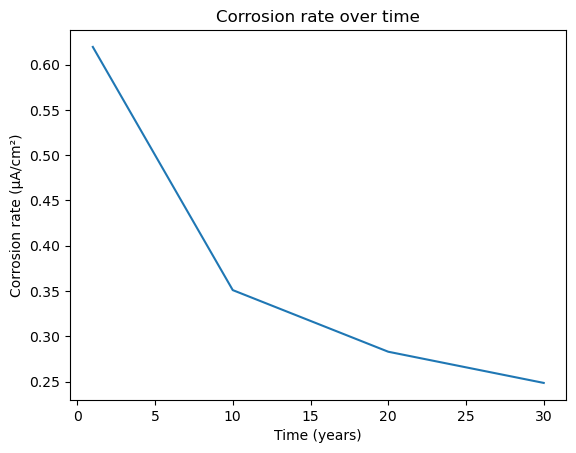

In [65]:
import math
import matplotlib.pyplot as plt

# Input data
time = [1, 10, 20, 30]
TKelvinNew = 30 + 273 # K
wc = 0.45 # water cement ratio
C = 50 # concrete cover thickness mm
Ct = 0.20  # chloride content by weight of concrete (kg/m3)
RHumNew = 90 # Relative humidity
Rho = 1 # concrete resistivity (kΩ cm)

# Calculate the corrosion rate over time
corrosion_rate = []
for t in time:
    lognew = (math.log(Ct - (3034 / (TKelvinNew * (2.5 + RHumNew) - (5*(10**-3) * Rho)))))
    corrosionratetimewisenew = (1.38 * (((1 - wc)**-1.64) / (((1 + t) * C)**(1/3)))) * math.exp(1.23 + 0.618 * lognew)
    corrosion_rate.append(corrosionratetimewisenew)

# Plot the corrosion rate over time
plt.plot(time, corrosion_rate)
plt.xlabel('Time (years)')
plt.ylabel('Corrosion rate (μA/cm²)')
plt.title('Corrosion rate over time')
plt.show()


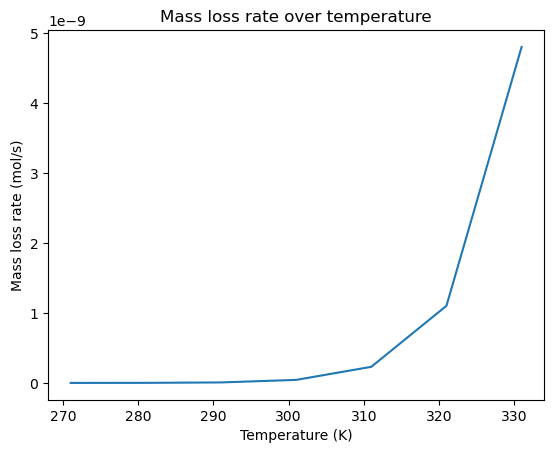

In [76]:
import math
import matplotlib.pyplot as plt

# Input data
Temp = [271, 281, 291, 301, 311, 321, 331]
R = 8.31446261815324 # Universal gas Constant J K-1 mol-1
EActEnergy = 130 * 1000 # Activation energy for the reaction in J/mol
A = 1.57 * (10**12) # Pre-exponential factor in s^-1, obtained from a research paper

# Calculate the mass loss rate using the Arrhenius equation
MassLossformula = []
for T in Temp:
    mass_loss_rate = A * math.exp(-EActEnergy / (R * T))
    MassLossformula.append(mass_loss_rate)

# Plot the mass loss rate over temperature
plt.plot(Temp, MassLossformula)
plt.xlabel('Temperature (K)')
plt.ylabel('Mass loss rate (mol/s)')
plt.title('Mass loss rate over temperature')
plt.show()
